In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import yfinance as yf

# Import MlFinLab tools
from mlfinlab.labeling.matrix_flags import MatrixFlagLabels

register_matplotlib_converters() 

In [2]:
# Load price data. This method works on price data for a single stock, so a pd.Series must be used
msft = yf.Ticker('SPY')
msft_df = msft.history(start='2019-1-1', end ='2020-5-18')

close = msft_df['Close']
close.head()

Date
2018-12-31    238.446457
2019-01-02    238.694534
2019-01-03    232.998581
2019-01-04    240.803085
2019-01-07    242.701736
Name: Close, dtype: float64

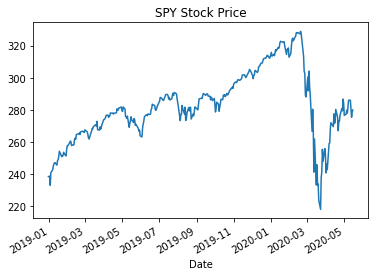

In [5]:
fig, ax = plt.subplots()
ax = plt.plot(close)
fig.autofmt_xdate()
plt.title('SPY Stock Price')
plt.xlabel('Date');

In [4]:
# We will use a window of 40
window1 = 40
Flags = MatrixFlagLabels(prices=close, window=window1, template_name='leigh_bull')
Flags.apply_labeling_matrix()

Date
2019-02-28   -2.125
2019-03-01   -2.375
2019-03-04   -2.000
2019-03-05   -2.375
2019-03-06   -2.375
              ...  
2020-05-11   -2.750
2020-05-12   -2.500
2020-05-13   -2.500
2020-05-14   -2.250
2020-05-15   -2.750
Length: 307, dtype: float64

In [6]:
# Use threshold of 3
categorical = Flags.apply_labeling_matrix(threshold=3)
categorical.value_counts()

-1    272
 1     35
dtype: int64

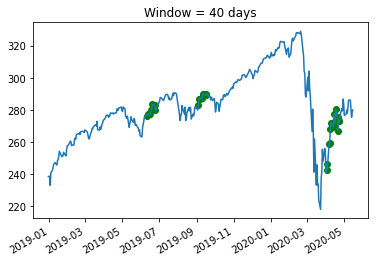

In [7]:
positives = close[window1:][categorical==1]

fig, ax = plt.subplots()
ax = plt.plot(close)
plt.scatter(positives.index, positives, color='g')
fig.autofmt_xdate()
plt.title('Window = 40 days');

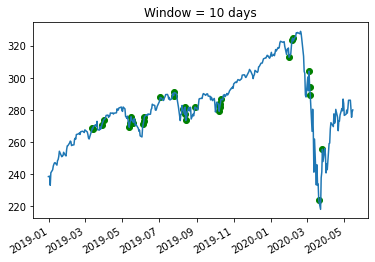

In [8]:
# Window is 10
Flags2 = MatrixFlagLabels(prices=close, window=10, template_name='leigh_bull')
categorical2 = Flags2.apply_labeling_matrix(threshold=3)
positives2 = close[10:][categorical2==1]
fig, ax = plt.subplots()
ax = plt.plot(close)
plt.scatter(positives2.index, positives2, color='g')
fig.autofmt_xdate()
plt.title('Window = 10 days');

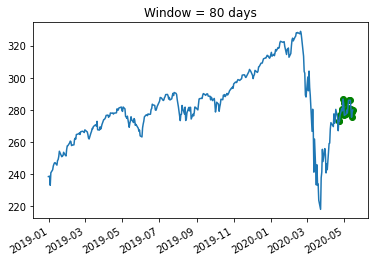

In [9]:
# Window is 80
Flags3 = MatrixFlagLabels(prices=close, window=80, template_name='leigh_bull')
categorical3 = Flags3.apply_labeling_matrix(threshold=3)
positives3 = close[80:][categorical3==1]
fig, ax = plt.subplots()
ax = plt.plot(close)
plt.scatter(positives3.index, positives3, color='g')
fig.autofmt_xdate()
plt.title('Window = 80 days');

In [10]:
# Cervelló-Royo's template
new_template = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, -1, -1, -1, -1, -1, -1],
                            [0, 0, 0, -1, -2, -2, -2, -2, -2, -2],
                            [0, 0, -1, -3, -3, -3, -3, -3, -3, -3],
                            [0, -1, -3, -5, -5, -5, -5, -5, -5, -5],
                            [0, -1, -5, -5, -5, -5, -5, -5, -5, -5],
                            [0, -1, -5, -5, -5, -5, -5, -5, -5, -5],
                            [5, -1, -5, -5, -5, -5, -5, -5, -5, -5]])

In [11]:
Flags4 = MatrixFlagLabels(prices=close, window=30, template_name=None)
Flags4.set_template(new_template)
Flags4.template

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,-1,-1,-1,-1,-1,-1
4,0,0,0,-1,-2,-2,-2,-2,-2,-2
5,0,0,-1,-3,-3,-3,-3,-3,-3,-3
6,0,-1,-3,-5,-5,-5,-5,-5,-5,-5
7,0,-1,-5,-5,-5,-5,-5,-5,-5,-5
8,0,-1,-5,-5,-5,-5,-5,-5,-5,-5
9,5,-1,-5,-5,-5,-5,-5,-5,-5,-5


Let's stick to the original template, but flip it horizontally to create the bear flag template instead. Note that we could have also initialized with template_name='leigh_bear' instead also.

In [12]:
window5=40
Flags5 = MatrixFlagLabels(prices=close, window=window5, template_name='leigh_bull')
bear_template = pd.DataFrame(np.flip(np.array(Flags5.template), axis=0))
Flags5.set_template(bear_template)
Flags5.template

,0,1,2,3,4,5,6,7,8,9
0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.5,0.5,-2.0,-2.5
1,-1.0,-1.0,-1.0,-0.5,0.0,0.5,1.0,1.0,0.0,-2.0
2,-0.5,-1.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0
3,-0.5,0.0,0.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0
4,0.0,0.0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,1.0
5,0.0,0.5,1.0,1.0,0.5,0.0,0.0,0.0,0.5,1.0
6,0.5,1.0,1.0,0.5,0.0,-0.5,-0.5,-0.5,0.0,1.0
7,1.0,1.0,0.5,0.0,-0.5,-0.5,-0.5,-0.5,0.0,0.5
8,1.0,0.5,0.0,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5,0.0
9,0.5,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


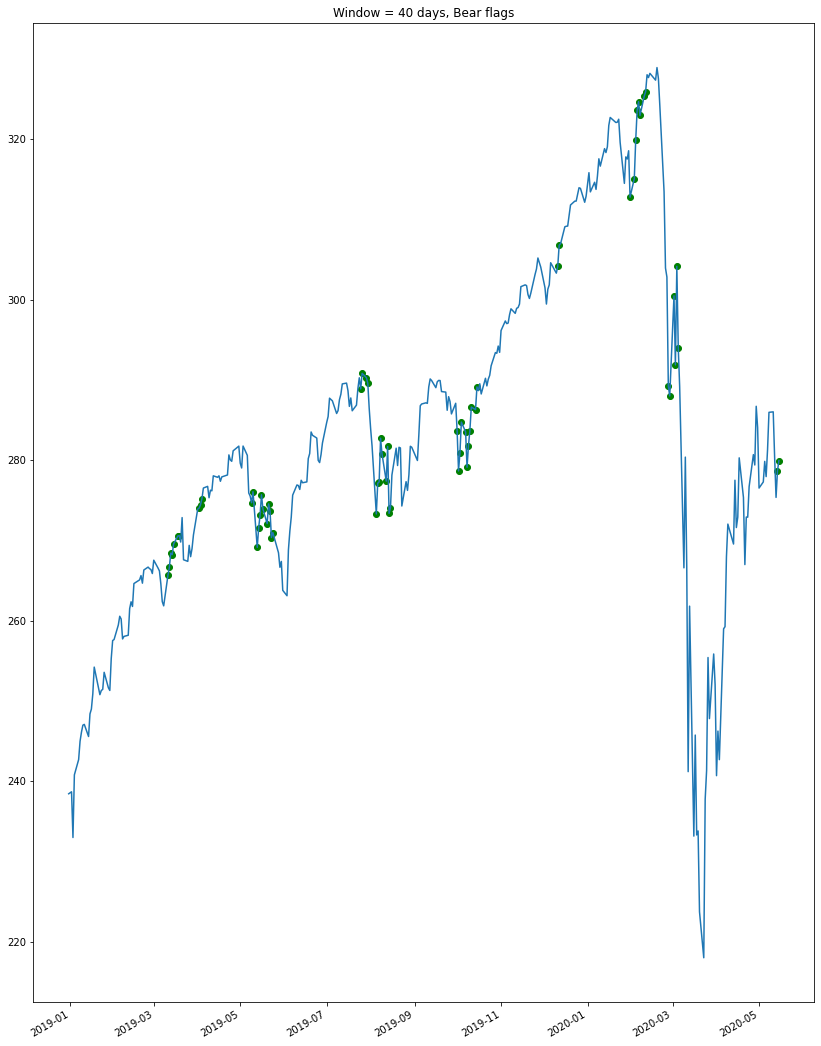

In [17]:
categorical5 = Flags5.apply_labeling_matrix(threshold=3)
positives5 = close[window5:][categorical5==1]
fig, ax = plt.subplots(figsize=(14,20))

ax = plt.plot(close)
plt.scatter(positives5.index, positives5, color='g')
fig.autofmt_xdate()
plt.title('Window = 40 days, Bear flags');